# The Sparks Foundation

# Data Science and Business Analytics Internship
# TASK 1- Prediction Using Supervised Machine Learning

# By- Vishwas Tiwari

Objective: Predict the percentage of students based on no. of study hours using Linear Regression and also predict the score if a student studies for 9.25 hours per day.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print('Data Successfully imported')

Data Successfully imported


In [3]:
#returns first 10 rows
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#dimensions of the dataframe
df.shape

(25, 2)

In [5]:
#statistical description of the dataframe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the Data

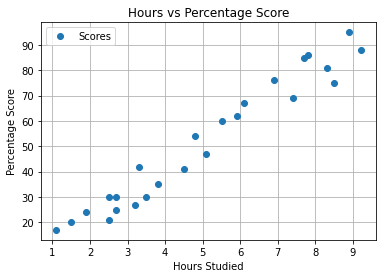

In [6]:
# Plotting the scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid() 
plt.show()

# Data Preparation

We will divide the data into 'feature'(input) and 'target'(output) as mentioned here as x and y respectively.

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Splitting the data into training set and test set

We will split the whole dataset into two parts- training and testing set

In [10]:
# Importing the train test split function
from sklearn.model_selection import train_test_split

# Splitting the Dataset into 80:20 ( 80% data for Training and 20% data for testing)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

# Implementing Linear Regression

In [11]:
#importing Linear Regression 
from sklearn.linear_model import LinearRegression


In [12]:
#training the model
regression = LinearRegression()
regression.fit(x_train, y_train)

print("Model Trained")

Model Trained


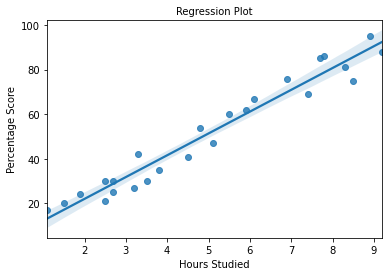

In [15]:
sns.regplot(x = df['Hours'], y = df['Scores'])
plt.title('Regression Plot', size = 10)
plt.xlabel('Hours Studied', size = 10)
plt.ylabel('Percentage Score', size = 10)
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions

In [16]:
#now predicting the percentage score
y_pred = regression.predict(x_test)

#comparing the predicted score with actual score
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Model Evaluation

The last step is to evaluate the performance of algorithm.We can evaluate by calculating the mean squared error or mean absolute error.There are many such metrics.

Mean Absolute Error

In [17]:
from sklearn import metrics
print("mean absoloute error:",metrics.mean_absolute_error(y_test,y_pred))

mean absoloute error: 4.183859899002975


Mean Squared Error

In [18]:
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))

mean squared error: 21.5987693072174


# Now, we will predict the score of student when he studies 9.25 hours per day.

In [23]:
hours = [9.25]
ans = regression.predict([hours])
print("Predicted Score if the student studies for 9.25 hours/day = {}".format(round(ans[0],3)))

Predicted Score if the student studies for 9.25 hours/day = 93.692
